## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

## Read Song Data

In [2]:
df = pd.read_csv('songs_to_cluster.csv')

## Get only Continuous Features

In [3]:
# Get only continuous values
cont_features = df[['danceability','energy','loudness','speechiness','acousticness',
                    'instrumentalness','liveness','valence','tempo']]

## Scale Continuous Features

In [4]:
# Scale data
scaler = StandardScaler()
cont_features_scaled = scaler.fit_transform(cont_features)

In [5]:
# create new dataframe of scaled data
cont_features_scaled_df = pd.DataFrame(cont_features_scaled, columns = cont_features.columns)
cont_features_scaled_df.iloc[1:10,]

danceability    energy  loudness  speechiness  acousticness  \
1     -0.104116  0.882129  1.027055    -0.582567     -0.809562   
2     -1.079385  1.300553  1.031917     2.639724     -0.700662   
3      0.052974  0.996990  0.913717    -0.558393     -0.809850   
4     -0.523024  1.214406  0.895182    -0.306992     -0.805876   
5      0.007156  1.021603  1.018547     0.186142     -0.596530   
6      0.537336  0.594975  0.378325    -0.444779     -0.810488   
7     -1.164476  1.267735  1.040728     0.534236     -0.810578   
8      0.347519  1.140567  0.655136    -0.299740     -0.793012   
9     -0.856841  1.169282  1.248565     0.336016     -0.809432   

   instrumentalness  liveness   valence     tempo  
1         -0.248328  0.284905 -0.217389 -0.919727  
2         -0.248328 -0.692450 -1.328580  1.457395  
3         -0.002041 -0.315704  0.795505 -0.162188  
4         -0.248316 -0.638531  0.175802 -0.950655  
5         -0.248328  1.649924  0.026218 -0.745056  
6         -0.247620  0.414582 -0.636223 -0.160775  
7         -0.248296 -0.721797 -0.362699  2.261205  
8         -0.248328 -0.452206  0.957910  0.182809  
9         -0.248113 -0.472681 -0.610580 -1.025198

## Desciptive Statistics

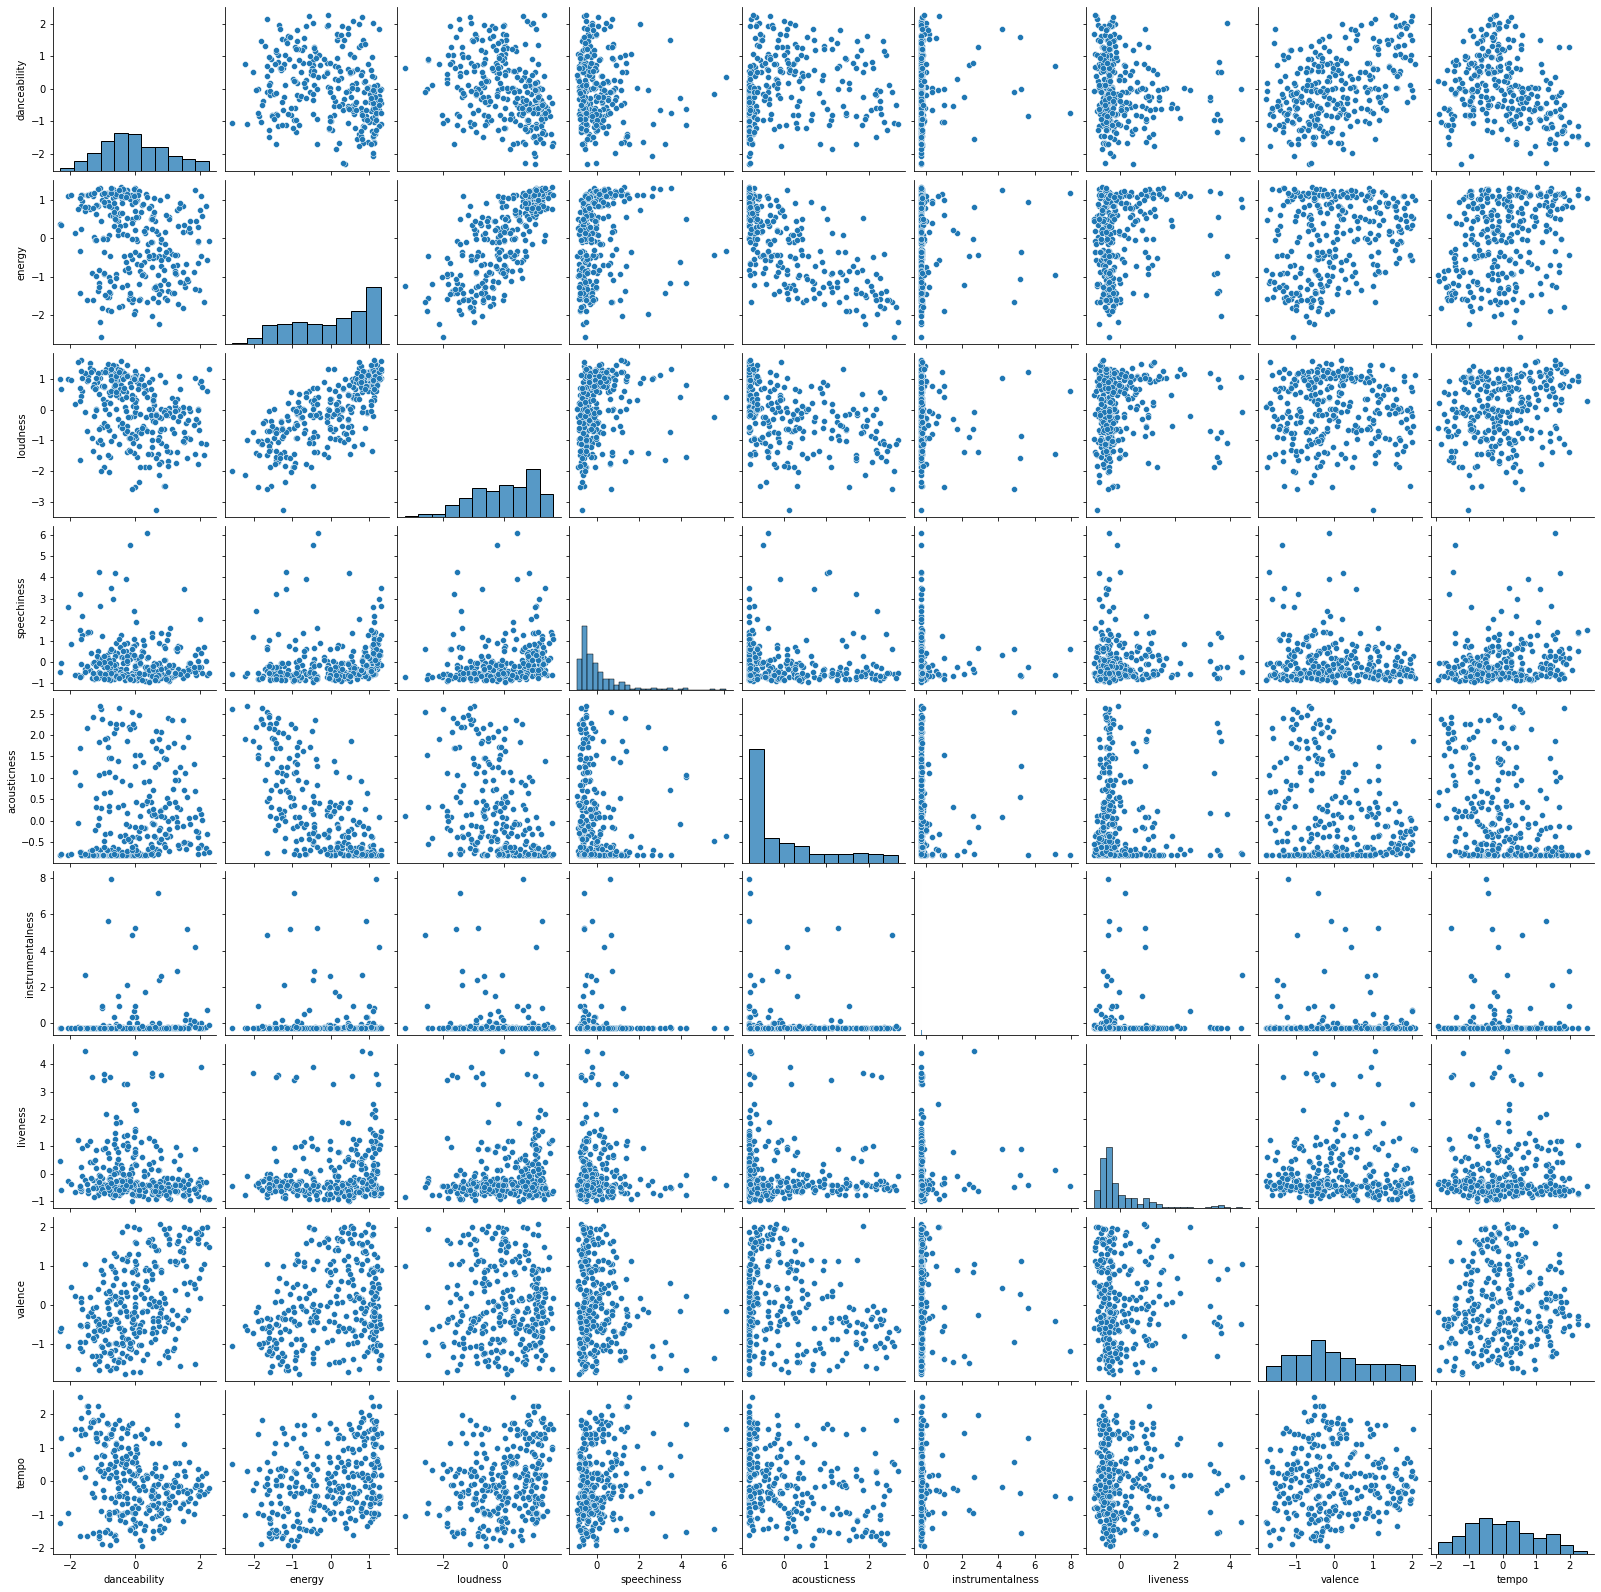

In [6]:
# Correlation Matrix
sns.pairplot(cont_features_scaled_df)

<AxesSubplot:>

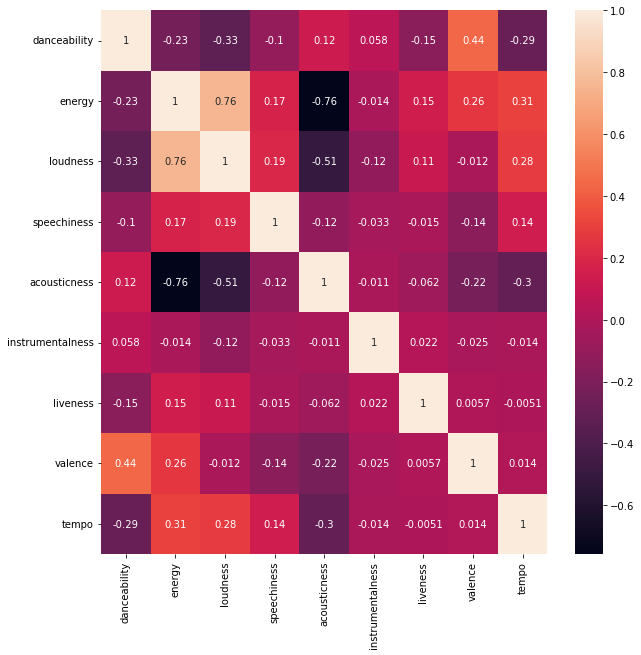

In [7]:
# Correlation heatmap

fig,ax = plt.subplots(figsize = (10,10))

sns.heatmap(cont_features_scaled_df.corr(), annot = True, ax = ax)

## Apply PCA to reduce dimensions

In [8]:
# Create PCA model, apply to scaled data

pca = PCA(n_components = 4)
pca_result = pca.fit_transform(cont_features_scaled)

format(pca.explained_variance_ratio_)

'[0.30654037 0.17304592 0.11786636 0.1115526 ]'

In [9]:
# explained variance of all PCs
print(sum(pca.explained_variance_ratio_))
# Sum of explained variance for all PCs is good

0.7090052477188821


In [10]:
# explained variance of PC1 and PC2
print(sum(pca.explained_variance_ratio_[:2]))
# Sum of explained variance for the first 2 PCs is ok

0.47958628356473926


## Apply K-Means Clustering

In [11]:
# fitting KMeans    
kmeans = KMeans(n_clusters = 3, init = "random", n_init = 10, max_iter = 300)    
kmeans.fit(cont_features_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

In [12]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2])

In [13]:
# Create 'Ground truth classification' array
zeros = [0 for i in range(0,100)]
ones = [1 for i in range(0,100)]
twos = [2 for i in range(0,100)]
labels_true = zeros + ones + twos
print(labels_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [14]:
# Add true labels and cluster results to the original dataframe
df['true_labels'] = labels_true
df['cluster_labels'] = kmeans.labels_

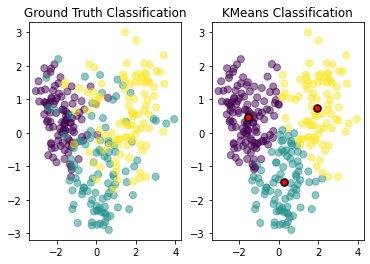

In [15]:
# Subplots Acutal vs Predicted

x = pca_result[:, 0]
y = pca_result[:, 1]

relabel = np.choose(kmeans.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x, y, c = labels_true,alpha=0.5, s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x, y, c = kmeans.labels_,alpha=0.5, s=50)
plt.title('KMeans Classification')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=50, linewidths=1.5,
                color='red', edgecolors = 'black',lw=1.5)
plt.show()

In [16]:
# measure accuracy of clustering algorithm

metrics.rand_score(labels_true, kmeans.labels_)

0.7571683389074694

## Visualize PC Loadings

In [17]:
dataset_sign_pca = pd.DataFrame(pca.components_, columns=cont_features.columns, index=['PC_1', 'PC_2','PC_3','PC_4'])
print('\n\n', dataset_sign_pca)    



       danceability    energy  loudness  speechiness  acousticness  \
PC_1      0.258978 -0.549564 -0.503074    -0.175175      0.476971   
PC_2     -0.581756 -0.190101  0.048466     0.221495      0.243417   
PC_3     -0.154801  0.055380 -0.016307    -0.428611     -0.004953   
PC_4      0.062710  0.005696 -0.114345     0.228973     -0.099487   

      instrumentalness  liveness   valence     tempo  
PC_1          0.049000 -0.113940 -0.063858 -0.316507  
PC_2         -0.053208  0.072921 -0.700156  0.128038  
PC_3          0.418590  0.763497 -0.009211 -0.175334  
PC_4          0.883392 -0.299782 -0.084011  0.208145  


In [18]:
# Weightings of Principal Component 1
px.bar(dataset_sign_pca.loc['PC_1'], color_discrete_sequence=["peachpuff"], 
       width=600, height=300, labels = {'index' : f'PC_1 ({pca.explained_variance_ratio_[0]*100:.2f}%)'})

In [19]:
# Weightings of Principal Component 2
px.bar(dataset_sign_pca.loc['PC_2'], color_discrete_sequence=["lightblue"], 
       width=600, height=300, labels = {'index' : f'PC_2 ({pca.explained_variance_ratio_[1]*100:.2f}%)'})

In [20]:
# Weightings of Principal Component 3
px.bar(dataset_sign_pca.loc['PC_3'], color_discrete_sequence=["IndianRed"], 
       width=600, height=300, labels = {'index' : f'PC_3 ({pca.explained_variance_ratio_[2]*100:.2f}%)'})

In [21]:
# Weightings of Principal Component 4
px.bar(dataset_sign_pca.loc['PC_4'], color_discrete_sequence=["MediumSeaGreen"], 
       width=600, height=300, labels = {'index' : f'PC_4 ({pca.explained_variance_ratio_[3]*100:.2f}%)'})

## Visualise PCA Biplots with clusters

In [22]:
# Biplot PC_1 vs PC_2 clustered by cluster_labels

X = cont_features_scaled

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(pca_result, x=0, y=1, color=df['cluster_labels'],labels={"0": "PC1", "1": "PC2"})

for i, feature in enumerate(cont_features.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0] *2,
        y1=loadings[i, 1] * 2,
        line = dict(color="RoyalBlue",width=2)
    )
    fig.add_annotation(
        x=loadings[i, 0] * 2,
        y=loadings[i, 1] * 2,
        ax=0, ay=0,
        xanchor="right",
        yanchor="bottom",
        text=feature
    )
    
fig.show()

In [23]:
# Biplot PC_2 vs PC_3 clustered by cluster_labels

X = cont_features_scaled

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(pca_result, x=1, y=2, color=df['cluster_labels'],labels={"1": "PC2", "2": "PC3"})

for i, feature in enumerate(cont_features.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 1] *2,
        y1=loadings[i, 2] * 2,
        line = dict(color="RoyalBlue",width=2)
    )
    fig.add_annotation(
        x=loadings[i, 1] * 2.5,
        y=loadings[i, 2] * 2.5,
        ax=0, ay=0,
        xanchor="left",
        yanchor="bottom",
        text=feature
    )
    
fig.show()

## PCA Elbow Plot Visualization

In [24]:
evr_df = pd.DataFrame(pca.explained_variance_ratio_, ['PC1','PC2','PC3','PC4'])
px.line(evr_df)

## Visualization of cluster song features

In [25]:
# Add cluster results to the scaled dataframe
cont_features_scaled_df['cluster_labels'] = kmeans.labels_

In [26]:
# Aggregate and groupby clusters 
clustered_features_df = cont_features_scaled_df.groupby('cluster_labels').mean()

# drop cluster column
cont_features_scaled_df = cont_features_scaled_df.drop(columns = ['cluster_labels'])

In [27]:
# Means of features
clustered_features_df

danceability    energy  loudness  speechiness  acousticness  \
cluster_labels                                                                
0                  -0.689465  0.782862  0.842928     0.307814     -0.648754   
1                   0.921130  0.124526 -0.325446    -0.174892     -0.225022   
2                   0.096365 -1.227251 -0.882540    -0.268749      1.133370   

                instrumentalness  liveness   valence     tempo  
cluster_labels                                                  
0                      -0.067195  0.216442 -0.276215  0.475846  
1                      -0.033306 -0.233963  1.112974 -0.159090  
2                       0.126939 -0.082976 -0.671907 -0.521729

In [28]:
# Characteristics of cluster 0
# Mainly characterised by accosticness and the lack of all other features
px.bar(clustered_features_df.iloc[0], width=600, height=300, 
       color_discrete_sequence=['darkblue'], labels = {'index':'Cluster 0'})

### Example Songs in cluster 0:

- Reelin' In The Years	Steely Dan	
- Forget Me Nots - Patrice Rushen	
- I Wanna Be Your Lover - Prince	
- Lovely Day - Bill Withers	
- The Way You Make Me Feel - 2012 Remaster	Michael Jackson	
- Never Too Much - Luther Vandross	
- U Can't Touch This - MC Hammer	
- September - Earth, Wind & Fire
- Good Times - CHIC
- The Best - Edit - Tina Turner	
- Everybody Wants To Rule The World  - Tears For Fears	

In [29]:
# Characteristics of cluster 1
# Characterised by high tempo, energy, loudness, speechiness and liveness and
# lack of danceability and accousticness
px.bar(clustered_features_df.iloc[1], width=600, height=300,
       color_discrete_sequence=['mediumvioletred'], labels = {'index':'Cluster 1'})

### Example Songs in cluster 1:

- Feel Invincible - Skillet	
- The Only Exception - Paramore	
- Don't Stop Believin' - Journey	
- Hail to the King - Avenged Sevenfold	
- One Step Closer - Linkin Park	
- I Don't Want to Miss a Thing - From "Armageddo...	Various Artists	"
- Hold the Line	- TOTO
- Any Way You Want It - Journey
- Scars - I Prevail
- Respect - Devour the Day

In [30]:
# Characteristics of cluster 2
# Characterised by high danceability and valence (happiness) and lack of liveness
px.bar(clustered_features_df.iloc[2], width=600, height=300, 
       color_discrete_sequence=['yellow'], labels = {'index':'Cluster 2'})

### Example songs in cluster 2:

- Best Part - (feat. Daniel Caesar)	H.E.R.	
- Like Someone In Love - Bruno Major	
- Paper Hearts - Tori Kelly
- Fast Car - Tracy Chapman	
- Wonderful Tonight - Eric Clapton	
- After the Love Has Gone - Earth, Wind & Fire	
- Free Fallin' - Tom Petty	
- Africa - TOTO	
- Moving On and Getting Over - John Mayer	
- Stickwitu - The Pussycat Dolls	

## Apply Hierarchical Clustering to scaled data

                  0
0      danceability
1            energy
2          loudness
3       speechiness
4      acousticness
5  instrumentalness
6          liveness
7           valence
8             tempo


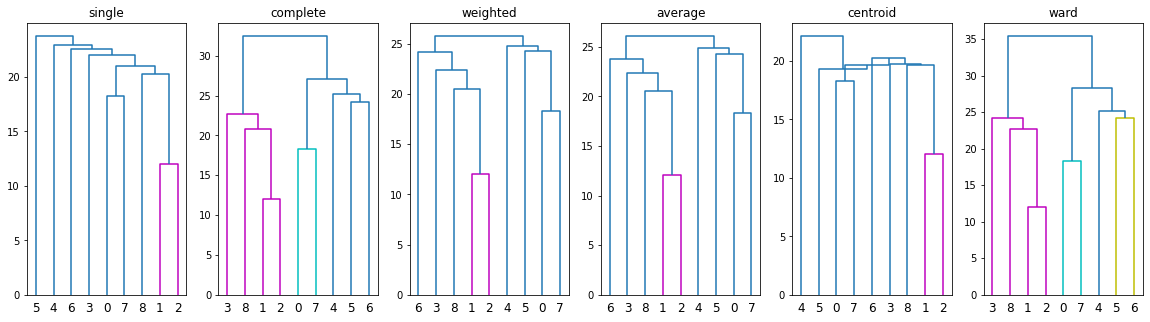

In [31]:
data = cont_features_scaled_df.T
S = hierarchy.linkage(data, 'single')
Co = hierarchy.linkage(data, 'complete')
We = hierarchy.linkage(data, 'weighted')
A = hierarchy.linkage(data, 'average')
Ce = hierarchy.linkage(data, 'centroid')
Wa = hierarchy.linkage(data, 'ward')

print(pd.DataFrame(cont_features.columns))

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1,6, figsize=(20, 5))
dn1 = hierarchy.dendrogram(S, ax=axes[0],
                           orientation='top')

dn2 = hierarchy.dendrogram(Co, ax=axes[1],
                           orientation='top')

dn3 = hierarchy.dendrogram(We, ax=axes[2],
                           orientation='top')

dn4 = hierarchy.dendrogram(A, ax=axes[3],
                           orientation='top')

dn5 = hierarchy.dendrogram(Ce, ax=axes[4],
                           orientation='top')

dn5 = hierarchy.dendrogram(Wa, ax=axes[5],
                           orientation='top')

axes[0].set_title('single')
axes[1].set_title('complete')
axes[2].set_title('weighted')
axes[3].set_title('average')
axes[4].set_title('centroid')
axes[5].set_title('ward')

plt.show()

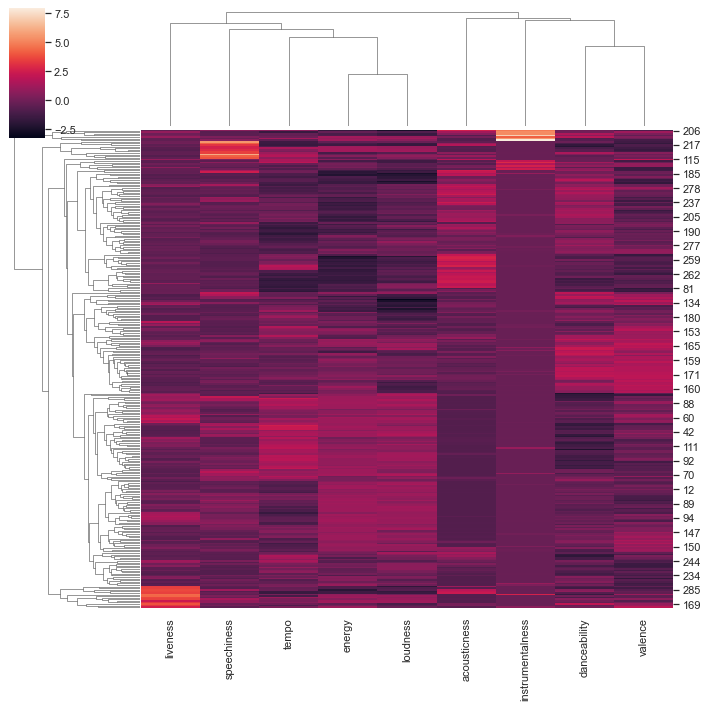

In [32]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(cont_features_scaled_df)